In [ ]:
# 필요한 패키지 설치치
!pip install selenium -q
!pip install tqdm -q


In [ ]:
# 필요한 라이브러리 임포트트
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
import requests
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException
import re
keys = ['car_name', 'car_year', 'car_km', 'car_price'] # 딕셔너리 생성을 위한 키값값
car_dict_result = {}
# 크롤링 함수 정의의
def data_parser(driver):
    # 데이터 파싱
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    li_lists = soup.select(f'#usedcarList > ul > li') 
    for li in li_lists:
        
        car_name = str(li.find_all('a', class_='name'))
        car_year = str(li.find_all('div',class_='col year'))
        car_km = str(li.find_all('div',class_='col km'))
        car_price = str(li.find_all('div',class_='col price'))

        # 정규식을 통한 데이터 추출출
        match = re.search(r'>\s*(.*?)</a>', car_name)
        match2 = re.search(r'class="middle">\s*(.*?)</div>', car_year)
        match3 = re.search(r'class="middle">\s*(.*?)</div>', car_km)
        match4 = re.search(r'class="num">\s*(.*?)</span>', car_price)
        
        if match:
            car_name = match.group(1)
        if match2:
            car_year = match2.group(1)
        if match3:
            car_km = match3.group(1)
        if match4:
            car_price = match4.group(1)
        # 데이터 딕셔너리에 추가가
        car_dict = dict(zip(keys, [car_name, car_year, car_km, car_price]))
        # 결과 딕셔너리에 합치기기
        car_dict_result[f'car_{len(car_dict_result) + 1}'] = car_dict
        # print(car_dict)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
import requests
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException
from tqdm import tqdm

url = 'https://auto.danawa.com/usedcar/?Work=list&Tab=list&Page=1&Order=8&Brand=&Series=&Model='
driver = webdriver.Chrome()
driver.get(url)   # 메이 사이트 접속
time.sleep(1)  # 웹사이트 기다림

# 페이지 넘기기
for page_num in tqdm(range(1, 152)):
    url = f'https://auto.danawa.com/usedcar/?Work=list&Tab=list&Page={page_num}&Order=8&Brand=&Series=&Model='
    driver = webdriver.Chrome()
    driver.get(url)   # 메이 사이트 접속
    time.sleep(1)  # 웹사이트 기다림
    # 크롤링하기롤링하기
    data_parser(driver)
    driver.quit()
# 종료
driver.quit()

100%|██████████| 151/151 [28:04<00:00, 11.16s/it]


In [122]:
# car_dict_result에서 인덱스를 제외한 자동차 정보만 새로운 딕셔너리로 저장
new_car_dict_result = {key: value for key, value in car_dict_result.items()}

# 결과 확인
for car in new_car_dict_result.values():
    print(car)


{'car_name': '벤츠 E클래스(5세대) E250 익스클루시브', 'car_year': '2021', 'car_km': '79,959km', 'car_price': '3,750', 'car_cate': 'E-클래스', 'car_brand': '벤츠'}
{'car_name': '현대 포터II CRDi 슈퍼캡 초장축 슈퍼', 'car_year': '2016', 'car_km': '246,169km', 'car_price': '740', 'car_cate': '포터', 'car_brand': '현대'}
{'car_name': '푸조 e-208 e-208 GT 라인', 'car_year': '2022', 'car_km': '32,195km', 'car_price': '2,160', 'car_cate': '기타', 'car_brand': '기타'}
{'car_name': '[]', 'car_year': '[]', 'car_km': '[]', 'car_price': '[]', 'car_cate': '기타', 'car_brand': '기타'}
{'car_name': '르노(삼성) QM6 2.0 dCi 2WD LE', 'car_year': '2017', 'car_km': '112,619km', 'car_price': '1,050', 'car_cate': 'QM6', 'car_brand': '르노코리아'}
{'car_name': 'BMW X5(4세대) 40i xDrive M 스포츠팩', 'car_year': '2021', 'car_km': '38,683km', 'car_price': '11,000', 'car_cate': 'X5', 'car_brand': 'BMW'}
{'car_name': '토요타 시에나 3.0 V6 ', 'car_year': '2017', 'car_km': '125,674km', 'car_price': '2,130', 'car_cate': '기타', 'car_brand': '기타'}
{'car_name': '기아 신형 카니발(KA4) 9인승 디젤 노

In [123]:
# 예시: 'car_cate'라는 열을 추가하고 값 지정
category = 'a'  # 예시로 모든 차의 카테고리를 'Sedan'으로 설정
brand = 'b'

# 'car_cate' 추가
for car in new_car_dict_result.values():
    car['car_cate'] = category
    car['car_brand'] = brand  # 각 자동차 딕셔너리에 car_cate 추가

# 결과 확인
for car in new_car_dict_result.values():
    print(car)


{'car_name': '벤츠 E클래스(5세대) E250 익스클루시브', 'car_year': '2021', 'car_km': '79,959km', 'car_price': '3,750', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': '현대 포터II CRDi 슈퍼캡 초장축 슈퍼', 'car_year': '2016', 'car_km': '246,169km', 'car_price': '740', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': '푸조 e-208 e-208 GT 라인', 'car_year': '2022', 'car_km': '32,195km', 'car_price': '2,160', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': '[]', 'car_year': '[]', 'car_km': '[]', 'car_price': '[]', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': '르노(삼성) QM6 2.0 dCi 2WD LE', 'car_year': '2017', 'car_km': '112,619km', 'car_price': '1,050', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': 'BMW X5(4세대) 40i xDrive M 스포츠팩', 'car_year': '2021', 'car_km': '38,683km', 'car_price': '11,000', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': '토요타 시에나 3.0 V6 ', 'car_year': '2017', 'car_km': '125,674km', 'car_price': '2,130', 'car_cate': 'a', 'car_brand': 'b'}
{'car_name': '기아 신형 카니발(KA4) 9인승 디젤 노블레스', 'car_year': '202

In [124]:
# 현대차 카테고리 설정
for car in new_car_dict_result.values():
    if '그랜저' in car['car_name']:
        car['car_cate'] = '그랜저'
        car['car_brand'] = '현대'
    elif '스타렉스' in car['car_name'] or '스타리아' in car['car_name']:
        car['car_cate'] = '스타렉스'
        car['car_brand'] = '현대'
    elif '아반떼' in car['car_name']:
        car['car_cate'] = '아반떼'
        car['car_brand'] = '현대'
    elif '쏘나타' in car['car_name']:
        car['car_cate'] = '쏘나타'
        car['car_brand'] = '현대'
    elif 'i30' in car['car_name']:
        car['car_cate'] = 'i30'
        car['car_brand'] = '현대'
    elif '갤로퍼' in car['car_name']:
        car['car_cate'] = '갤로퍼'
        car['car_brand'] = '현대'
    elif '에쿠스' in car['car_name']:
        car['car_cate'] = '에쿠스'
        car['car_brand'] = '현대'
    elif '엑센트' in car['car_name']:
        car['car_cate'] = '엑센트'
        car['car_brand'] = '현대'
    elif '투싼' in car['car_name']:
        car['car_cate'] = '투싼'
        car['car_brand'] = '현대'
    elif '제네시스' in car['car_name']:
        car['car_cate'] = '제네시스'
        car['car_brand'] = '현대'
    elif 'i40' in car['car_name']:
        car['car_cate'] = 'i40'
        car['car_brand'] = '현대'
    elif '벨로스터' in car['car_name']:
        car['car_cate'] = '벨로스터'
        car['car_brand'] = '현대'
    elif '맥스크루즈' in car['car_name']:
        car['car_cate'] = '맥스크루즈'
        car['car_brand'] = '현대'
    elif '아이오닉' in car['car_name']:
        car['car_cate'] = '아이오닉'
        car['car_brand'] = '현대'
    elif '코나' in car['car_name']:
        car['car_cate'] = '코나'
        car['car_brand'] = '현대'
    elif '팰리세이드' in car['car_name']:
        car['car_cate'] = '펠리세이드'
        car['car_brand'] = '현대'
    elif '넥쏘' in car['car_name']:
        car['car_cate'] = '넥쏘'
        car['car_brand'] = '현대'
    elif '아슬란' in car['car_name']:
        car['car_cate'] = '아슬란'
        car['car_brand'] = '현대'
    elif '마이티' in car['car_name']:
        car['car_cate'] = '마이티'
        car['car_brand'] = '현대'
    elif '베뉴' in car['car_name']:
        car['car_cate'] = '베뉴'
        car['car_brand'] = '현대'
    elif '베라크루즈' in car['car_name']:
        car['car_cate'] = '베라크루즈'
        car['car_brand'] = '현대'
    elif '쏠라티' in car['car_name']:
        car['car_cate'] = '쏠라티'
        car['car_brand'] = '현대'
    elif '포터' in car['car_name']:
        car['car_cate'] = '포터'
        car['car_brand'] = '현대'
    elif '싼타페' in car['car_name']:
        car['car_cate'] = '싼타페'
        car['car_brand'] = '현대'
    elif '캐스퍼' in car['car_name']:
        car['car_cate'] = '캐스퍼'
        car['car_brand'] = '현대'

In [125]:
# 제네시스 카테고리 설정
for car in new_car_dict_result.values():
    if 'G80' in car['car_name']:
        car['car_cate'] = 'G80'
        car['car_brand'] = '제네시스'
    elif 'G90' in car['car_name']:
        car['car_cate'] = 'G90'
        car['car_brand'] = '제네시스'
    elif 'GV80' in car['car_name']:
        car['car_cate'] = 'GV80'
        car['car_brand'] = '제네시스'
    elif 'GV70' in car['car_name']:
        car['car_cate'] = 'GV70'
        car['car_brand'] = '제네시스'
    elif 'G70' in car['car_name']:
        car['car_cate'] = 'G70'
        car['car_brand'] = '제네시스'
    elif 'GV60' in car['car_name']:
        car['car_cate'] = 'GV60'
        car['car_brand'] = '제네시스'


In [126]:
# 기아 카테고리 설정
for car in new_car_dict_result.values():
    if 'EV6' in car['car_name']:
        car['car_cate'] = 'EV6'
        car['car_brand'] = '기아'
    elif 'K3' in car['car_name']:
        car['car_cate'] = 'K3'
        car['car_brand'] = '기아'
    elif 'K5' in car['car_name']:
        car['car_cate'] = 'K5'
        car['car_brand'] = '기아'
    elif 'K7' in car['car_name']:
        car['car_cate'] = 'K7'
        car['car_brand'] = '기아'
    elif 'K8' in car['car_name']:
        car['car_cate'] = 'K8'
        car['car_brand'] = '기아'
    elif 'K9' in car['car_name']:
        car['car_cate'] = 'K9'
        car['car_brand'] = '기아'
    elif '니로' in car['car_name']:
        car['car_cate'] = '니로'
        car['car_brand'] = '기아'
    elif '레이' in car['car_name']:
        car['car_cate'] = '레이'
        car['car_brand'] = '기아'
    elif '모닝' in car['car_name']:
        car['car_cate'] = '모닝'
        car['car_brand'] = '기아'
    elif '모하비' in car['car_name']:
        car['car_cate'] = '모하비'
        car['car_brand'] = '기아'
    elif '봉고' in car['car_name']:
        car['car_cate'] = '봉고'
        car['car_brand'] = '기아'
    elif '셀토스' in car['car_name']:
        car['car_cate'] = '셀토스'
        car['car_brand'] = '기아'
    elif '스토닉' in car['car_name']:
        car['car_cate'] = '스토닉'
        car['car_brand'] = '기아'
    elif '스팅어' in car['car_name']:
        car['car_cate'] = '스팅어'
        car['car_brand'] = '기아'
    elif '스포티지' in car['car_name']:
        car['car_cate'] = '스포티지'
        car['car_brand'] = '기아'
    elif '쏘렌토' in car['car_name']:
        car['car_cate'] = '쏘렌토'
        car['car_brand'] = '기아'
    elif '쏘울' in car['car_name']:
        car['car_cate'] = '쏘울'
        car['car_brand'] = '기아'
    elif '오피러스' in car['car_name']:
        car['car_cate'] = '오피러스'
        car['car_brand'] = '기아'
    elif '카니발' in car['car_name']:
        car['car_cate'] = '카니발'
        car['car_brand'] = '기아'
    elif '카렌스' in car['car_name']:
        car['car_cate'] = '카렌스'
        car['car_brand'] = '기아'
    elif '프라이드' in car['car_name']:
        car['car_cate'] = '프라이드'
        car['car_brand'] = '기아'


In [127]:
# 쉐보레 카테고리 설정
for car in new_car_dict_result.values():
    if '다마스' in car['car_name']:
        car['car_cate'] = '다마스'
        car['car_brand'] = '쉐보레'
    elif '라보' in car['car_name']:
        car['car_cate'] = '라보'
        car['car_brand'] = '쉐보레'
    elif '라세티' in car['car_name']:
        car['car_cate'] = '라세티'
        car['car_brand'] = '쉐보레'
    elif '마티즈' in car['car_name']:
        car['car_cate'] = '마티즈'
        car['car_brand'] = '쉐보레'
    elif '말리부' in car['car_name']:
        car['car_cate'] = '말리부'
        car['car_brand'] = '쉐보레'
    elif '볼트 EV' in car['car_name']:
        car['car_cate'] = '볼트 EV'
        car['car_brand'] = '쉐보레'
    elif '스파크' in car['car_name']:
        car['car_cate'] = '스파크'
        car['car_brand'] = '쉐보레'
    elif '아베오' in car['car_name']:
        car['car_cate'] = '아베오'
        car['car_brand'] = '쉐보레'
    elif '알페온' in car['car_name']:
        car['car_cate'] = '알페온'
        car['car_brand'] = '쉐보레'
    elif '올란도' in car['car_name']:
        car['car_cate'] = '올란도'
        car['car_brand'] = '쉐보레'
    elif '이쿼녹스' in car['car_name']:
        car['car_cate'] = '이쿼녹스'
        car['car_brand'] = '쉐보레'
    elif '임팔라' in car['car_name']:
        car['car_cate'] = '임팔라'
        car['car_brand'] = '쉐보레'
    elif '카마로' in car['car_name']:
        car['car_cate'] = '카마로'
        car['car_brand'] = '쉐보레'
    elif '캡티바' in car['car_name']:
        car['car_cate'] = '캡티바'
        car['car_brand'] = '쉐보레'
    elif '콜로라도' in car['car_name']:
        car['car_cate'] = '콜로라도'
        car['car_brand'] = '쉐보레'
    elif '크루즈' in car['car_name']:
        car['car_cate'] = '크루즈'
        car['car_brand'] = '쉐보레'
    elif '트래버스' in car['car_name']:
        car['car_cate'] = '트래버스'
        car['car_brand'] = '쉐보레'
    elif '트랙스' in car['car_name']:
        car['car_cate'] = '트랙스'
        car['car_brand'] = '쉐보레'
    elif '트레일블레이저' in car['car_name']:
        car['car_cate'] = '트레일블레이저'
        car['car_brand'] = '쉐보레'


In [128]:
# KGM 카테고리 설정
for car in new_car_dict_result.values():
    if '렉스턴' in car['car_name']:
        car['car_cate'] = '렉스턴'
        car['car_brand'] = 'KGM'
    elif '엑티언' in car['car_name']:
        car['car_cate'] = '엑티언'
        car['car_brand'] = 'KGM'
    elif '체어맨' in car['car_name']:
        car['car_cate'] = '체어맨'
        car['car_brand'] = 'KGM'
    elif '코란도' in car['car_name']:
        car['car_cate'] = '코란도'
        car['car_brand'] = 'KGM'
    elif '토레스' in car['car_name']:
        car['car_cate'] = '토레스'
        car['car_brand'] = 'KGM'
    elif '티볼리' in car['car_name']:
        car['car_cate'] = '티볼리'
        car['car_brand'] = 'KGM'


In [129]:
# 르노코리아 카테고리 설정
for car in new_car_dict_result.values():
    if 'QM3' in car['car_name']:
        car['car_cate'] = 'QM3'
        car['car_brand'] = '르노코리아'
    elif 'QM5' in car['car_name']:
        car['car_cate'] = 'QM5'
        car['car_brand'] = '르노코리아'
    elif 'QM6' in car['car_name']:
        car['car_cate'] = 'QM6'
        car['car_brand'] = '르노코리아'
    elif 'SM3' in car['car_name']:
        car['car_cate'] = 'SM3'
        car['car_brand'] = '르노코리아'
    elif 'SM5' in car['car_name']:
        car['car_cate'] = 'SM5'
        car['car_brand'] = '르노코리아'
    elif 'SM6' in car['car_name']:
        car['car_cate'] = 'SM6'
        car['car_brand'] = '르노코리아'
    elif 'SM7' in car['car_name']:
        car['car_cate'] = 'SM7'
        car['car_brand'] = '르노코리아'
    elif 'XM3' in car['car_name']:
        car['car_cate'] = 'XM3'
        car['car_brand'] = '르노코리아'
    elif '그랑 콜레오스' in car['car_name']:
        car['car_cate'] = '그랑 콜레오스'
        car['car_brand'] = '르노코리아'
    elif '마스터' in car['car_name']:
        car['car_cate'] = '마스터'
        car['car_brand'] = '르노코리아'
    elif '아르카나' in car['car_name']:
        car['car_cate'] = '아르카나'
        car['car_brand'] = '르노코리아'
    elif '조에' in car['car_name']:
        car['car_cate'] = '조에'
        car['car_brand'] = '르노코리아'
    elif '클리오' in car['car_name']:
        car['car_cate'] = '클리오'
        car['car_brand'] = '르노코리아'


In [130]:
# BMW 카테고리 설정
for car in new_car_dict_result.values():
    if '1시리즈' in car['car_name']:
        car['car_cate'] = '1시리즈'
        car['car_brand'] = 'BMW'
    elif '2시리즈' in car['car_name']:
        car['car_cate'] = '2시리즈'
        car['car_brand'] = 'BMW'
    elif '3시리즈' in car['car_name']:
        car['car_cate'] = '3시리즈'
        car['car_brand'] = 'BMW'
    elif '4시리즈' in car['car_name']:
        car['car_cate'] = '4시리즈'
        car['car_brand'] = 'BMW'
    elif '5시리즈' in car['car_name']:
        car['car_cate'] = '5시리즈'
        car['car_brand'] = 'BMW'
    elif '6시리즈' in car['car_name']:
        car['car_cate'] = '6시리즈'
        car['car_brand'] = 'BMW'
    elif '7시리즈' in car['car_name']:
        car['car_cate'] = '7시리즈'
        car['car_brand'] = 'BMW'
    elif 'i5' in car['car_name']:
        car['car_cate'] = 'i5'
        car['car_brand'] = 'BMW'
    elif 'M2' in car['car_name']:
        car['car_cate'] = 'M2'
        car['car_brand'] = 'BMW'
    elif 'M4' in car['car_name']:
        car['car_cate'] = 'M4'
        car['car_brand'] = 'BMW'
    elif 'X1' in car['car_name']:
        car['car_cate'] = 'X1'
        car['car_brand'] = 'BMW'
    elif 'X2' in car['car_name']:
        car['car_cate'] = 'X2'
        car['car_brand'] = 'BMW'
    elif 'X3' in car['car_name']:
        car['car_cate'] = 'X3'
        car['car_brand'] = 'BMW'
    elif 'X4' in car['car_name']:
        car['car_cate'] = 'X4'
        car['car_brand'] = 'BMW'
    elif 'X5' in car['car_name']:
        car['car_cate'] = 'X5'
        car['car_brand'] = 'BMW'
    elif 'X6' in car['car_name']:
        car['car_cate'] = 'X6'
        car['car_brand'] = 'BMW'
    elif 'X7' in car['car_name']:
        car['car_cate'] = 'X7'
        car['car_brand'] = 'BMW'
    elif 'Z4' in car['car_name']:
        car['car_cate'] = 'Z4'
        car['car_brand'] = 'BMW'
    elif '그란투리스모' in car['car_name']:
        car['car_cate'] = '그란투리스모'
        car['car_brand'] = 'BMW'


In [131]:
# 벤츠 카테고리 설정
for car in new_car_dict_result.values():
    if 'A-클래스' in car['car_name'] or 'A클래스' in car['car_name']:
        car['car_cate'] = 'A-클래스'
        car['car_brand'] = '벤츠'
    elif 'AMG GT' in car['car_name']:
        car['car_cate'] = 'AMG GT'
        car['car_brand'] = '벤츠'
    elif 'B-클래스' in car['car_name'] or 'B클래스' in car['car_name']:
        car['car_cate'] = 'B-클래스'
        car['car_brand'] = '벤츠'
    elif 'C-클래스' in car['car_name'] or 'C클래스' in car['car_name']:
        car['car_cate'] = 'C-클래스'
        car['car_brand'] = '벤츠'
    elif 'CLA-클래스' in car['car_name'] or 'CLA클래스' in car['car_name']:
        car['car_cate'] = 'CLA-클래스'
        car['car_brand'] = '벤츠'
    elif 'CLS-클래스' in car['car_name'] or 'CLS클래스' in car['car_name']:
        car['car_cate'] = 'CLS-클래스'
        car['car_brand'] = '벤츠'
    elif 'E-클래스' in car['car_name'] or 'E클래스' in car['car_name']:
        car['car_cate'] = 'E-클래스'
        car['car_brand'] = '벤츠'
    elif 'EQS' in car['car_name']:
        car['car_cate'] = 'EQS'
        car['car_brand'] = '벤츠'
    elif 'G-클래스' in car['car_name'] or 'G클래스' in car['car_name']:
        car['car_cate'] = 'G-클래스'
        car['car_brand'] = '벤츠'
    elif 'GLA-클래스' in car['car_name'] or 'GLA클래스' in car['car_name']:
        car['car_cate'] = 'GLA-클래스'
        car['car_brand'] = '벤츠'
    elif 'GLB-클래스' in car['car_name'] or 'GLB클래스' in car['car_name']:
        car['car_cate'] = 'GLB-클래스'
        car['car_brand'] = '벤츠'
    elif 'GLC-클래스' in car['car_name'] or 'GLC클래스' in car['car_name']:
        car['car_cate'] = 'GLC-클래스'
        car['car_brand'] = '벤츠'
    elif 'GLE-클래스' in car['car_name'] or 'GLE클래스' in car['car_name']:
        car['car_cate'] = 'GLE-클래스'
        car['car_brand'] = '벤츠'
    elif 'GLK-클래스' in car['car_name'] or 'GLK클래스' in car['car_name']:
        car['car_cate'] = 'GLK-클래스'
        car['car_brand'] = '벤츠'
    elif 'GLS-클래스' in car['car_name'] or 'GLS클래스' in car['car_name']:
        car['car_cate'] = 'GLS-클래스'
        car['car_brand'] = '벤츠'
    elif 'S-클래스' in car['car_name'] or 'S클래스' in car['car_name']:
        car['car_cate'] = 'S-클래스'
        car['car_brand'] = '벤츠'


In [132]:
# 아우디 카테고리 설정
for car in new_car_dict_result.values():
    if 'A3' in car['car_name']:
        car['car_cate'] = 'A3'
        car['car_brand'] = '아우디'
    elif 'A4' in car['car_name']:
        car['car_cate'] = 'A4'
        car['car_brand'] = '아우디'
    elif 'A5' in car['car_name']:
        car['car_cate'] = 'A5'
        car['car_brand'] = '아우디'
    elif 'A6' in car['car_name']:
        car['car_cate'] = 'A6'
        car['car_brand'] = '아우디'
    elif 'A7' in car['car_name']:
        car['car_cate'] = 'A7'
        car['car_brand'] = '아우디'
    elif 'A8' in car['car_name']:
        car['car_cate'] = 'A8'
        car['car_brand'] = '아우디'
    elif 'Q3' in car['car_name']:
        car['car_cate'] = 'Q3'
        car['car_brand'] = '아우디'
    elif 'Q4' in car['car_name']:
        car['car_cate'] = 'Q4'
        car['car_brand'] = '아우디'
    elif 'Q5' in car['car_name']:
        car['car_cate'] = 'Q5'
        car['car_brand'] = '아우디'
    elif 'Q7' in car['car_name']:
        car['car_cate'] = 'Q7'
        car['car_brand'] = '아우디'
    elif 'Q8' in car['car_name']:
        car['car_cate'] = 'Q8'
        car['car_brand'] = '아우디'
    elif 'TT' in car['car_name']:
        car['car_cate'] = 'TT'
        car['car_brand'] = '아우디'


In [136]:
# 결과 확인 및 기타 처리리
count = 0
for car in new_car_dict_result.values():
    if car['car_cate'] == 'a':
        car['car_cate'] = '기타'
        car['car_brand'] = '기타'
        print(car)
print(count)

0


In [137]:
# 결과 확인
count = 0
for car in new_car_dict_result.values():
    if car['car_cate'] == 'a':
        count +=1
        print(car)
print(count)

0


In [145]:
# 새로운 차량 데이터를 삽입하기 전에 빈 값이나 잘못된 값 체크
for car_key, car in new_car_dict_result.items():
    # car_year가 딕셔너리에 있고 빈 값이 아닌 경우 변환
    if 'car_year' in car and car['car_year'] not in ['', '[]', None]:
        car['car_year'] = int(car['car_year'])
    else:
        car['car_year'] = None  # 빈 값일 경우 None으로 처리 (또는 기본 값 설정)

    # car_price가 딕셔너리에 있고 빈 값이 아닌 경우 변환
    if 'car_price' in car and car['car_price'] not in ['', '[]', None]:
        if isinstance(car['car_price'], str):  # 문자열인 경우에만 replace() 사용
            car['car_price'] = int(car['car_price'].replace(',', ''))
        else:
            car['car_price'] = int(car['car_price'])  # 이미 int인 경우 그대로 사용
    else:
        car['car_price'] = None  # 빈 값일 경우 None으로 처리 (또는 기본 값 설정)

    # car_km가 딕셔너리에 있고 빈 값이 아닌 경우 변환
    if 'car_km' in car and car['car_km'] not in ['', '[]', None]:
        if isinstance(car['car_km'], str):  # 문자열인 경우에만 replace() 사용
            car['car_km'] = int(car['car_km'].replace('km', '').replace(',', '').strip())
        else:
            car['car_km'] = int(car['car_km'])  # 이미 int인 경우 그대로 사용
    else:
        car['car_km'] = None  # 빈 값일 경우 None으로 처리 (또는 기본 값 설정)

    # 결과 확인
    print(car)


{'car_name': '벤츠 E클래스(5세대) E250 익스클루시브', 'car_year': 2021, 'car_km': 79959, 'car_price': 3750, 'car_cate': 'E-클래스', 'car_brand': '벤츠'}
{'car_name': '현대 포터II CRDi 슈퍼캡 초장축 슈퍼', 'car_year': 2016, 'car_km': 246169, 'car_price': 740, 'car_cate': '포터', 'car_brand': '현대'}
{'car_name': '푸조 e-208 e-208 GT 라인', 'car_year': 2022, 'car_km': 32195, 'car_price': 2160, 'car_cate': '기타', 'car_brand': '기타'}
{'car_name': '[]', 'car_year': None, 'car_km': None, 'car_price': None, 'car_cate': '기타', 'car_brand': '기타'}
{'car_name': '르노(삼성) QM6 2.0 dCi 2WD LE', 'car_year': 2017, 'car_km': 112619, 'car_price': 1050, 'car_cate': 'QM6', 'car_brand': '르노코리아'}
{'car_name': 'BMW X5(4세대) 40i xDrive M 스포츠팩', 'car_year': 2021, 'car_km': 38683, 'car_price': 11000, 'car_cate': 'X5', 'car_brand': 'BMW'}
{'car_name': '토요타 시에나 3.0 V6 ', 'car_year': 2017, 'car_km': 125674, 'car_price': 2130, 'car_cate': '기타', 'car_brand': '기타'}
{'car_name': '기아 신형 카니발(KA4) 9인승 디젤 노블레스', 'car_year': 2021, 'car_km': 66718, 'car_price': 3150,

In [149]:
import json

# car_dict_result 딕셔너리를 로컬 파일로 저장
def save_to_json_file(file_name, data):
    try:
        with open(file_name, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=4)  # indent=4로 들여쓰기하여 가독성 좋게 저장
        print(f"Data successfully saved to {file_name}")
    except Exception as e:
        print(f"Error saving data: {e}")

# 예시: 파일 저장
save_to_json_file("used_car_data.json", new_car_dict_result)


Data successfully saved to used_car_data.json


In [105]:
# 필요한 라이브러리 다운운
!pip install mysql-connector-python -q 

In [ ]:
# 데이터 베이스 연결정보
# !pip install mysql-connector-python -q 
from mysql import connector
args = {
  'host' : 'localhost',
  'user' : 'root',
  'password' : 'root1234',
  'port' : 3306
}
try:
    # 접속 여부 확인
    conn = connector.connect(**args)
    cursor = conn.cursor()

    # 데이터 베이스 생성
    sql = 'create database if not exists used_car;'
    cursor.execute(sql)
    # 데이터 베이스 선택
    sql = 'use used_car;'
    cursor.execute(sql)
    # 테이블 생성
    # {'car_name': '벤츠 마이바흐 57 ', 'car_year': '2003', 'car_km': '100,998km', 'car_price': '4,800', 'car_cate': '기타', 'car_brand': '기타'}
    sql = '''
        create table if not exists used_car_table(
            id int AUTO_INCREMENT primary key,
            car_name varchar(100)
            ,car_year INT
            ,car_km INT
            ,car_price INT
            ,car_cate varchar(100)
            ,car_brand varchar(100)
        )
    '''
    cursor.execute(sql)
    # 데이터 삽입
    for car_key, car in new_car_dict_result.items():
        # 각 car 항목에 대해 적절한 값을 순서대로 삽입
        sql = 'insert into used_car_table (car_name, car_year, car_km, car_price, car_cate, car_brand) values(%s, %s, %s, %s, %s, %s);'
        
        # 디버깅: 실행할 SQL과 값을 출력
        # print("SQL Query:", sql)
        # print("Values to Insert:", (
        #     car.get('car_name', ''),
        #     car.get('car_year', 0),
        #     car.get('car_km', 0),
        #     car.get('car_price', 0),
        #     car.get('car_cate', ''),
        #     car.get('car_brand', '')
        # ))
        # sql문 실행행
        cursor.execute(sql, (
            car.get('car_name', ''),
            car.get('car_year', 0),
            car.get('car_km', 0),
            car.get('car_price', 0),
            car.get('car_cate', ''),
            car.get('car_brand', '')
        ))

    # 모든 작업이 끝나면 commit() 해서 최종 반영
    conn.commit()
except Exception as e:
    print(f"erro : {e}")
else:
    print("정상처리 되었습니다")
finally:
    # 사용이 끝나면 자원 해제
    if cursor: 
        cursor.close()
    if conn: 
        conn.close()

SQL Query: insert into used_car_table (car_name, car_year, car_km, car_price, car_cate, car_brand) values(%s, %s, %s, %s, %s, %s);
Values to Insert: ('벤츠 E클래스(5세대) E250 익스클루시브', 2021, 79959, 3750, 'E-클래스', '벤츠')
SQL Query: insert into used_car_table (car_name, car_year, car_km, car_price, car_cate, car_brand) values(%s, %s, %s, %s, %s, %s);
Values to Insert: ('현대 포터II CRDi 슈퍼캡 초장축 슈퍼', 2016, 246169, 740, '포터', '현대')
SQL Query: insert into used_car_table (car_name, car_year, car_km, car_price, car_cate, car_brand) values(%s, %s, %s, %s, %s, %s);
Values to Insert: ('푸조 e-208 e-208 GT 라인', 2022, 32195, 2160, '기타', '기타')
SQL Query: insert into used_car_table (car_name, car_year, car_km, car_price, car_cate, car_brand) values(%s, %s, %s, %s, %s, %s);
Values to Insert: ('[]', None, None, None, '기타', '기타')
SQL Query: insert into used_car_table (car_name, car_year, car_km, car_price, car_cate, car_brand) values(%s, %s, %s, %s, %s, %s);
Values to Insert: ('르노(삼성) QM6 2.0 dCi 2WD LE', 2017, 1126

In [153]:
!pip install matplotlib
!pip install seaborn

In [155]:
import pandas as pd

# new_car_dict_result을 DataFrame으로 변환
df = pd.DataFrame(new_car_dict_result).T  # .T는 transpose(전치)로, 딕셔너리의 각 항목을 행(row)으로 변환

# DataFrame 확인
print(df.head())


                        car_name car_year  car_km car_price car_cate car_brand
car_1   벤츠 E클래스(5세대) E250 익스클루시브     2021   79959      3750    E-클래스        벤츠
car_2    현대 포터II CRDi 슈퍼캡 초장축 슈퍼     2016  246169       740       포터        현대
car_3       푸조 e-208 e-208 GT 라인     2022   32195      2160       기타        기타
car_4                         []     None    None      None       기타        기타
car_5  르노(삼성) QM6 2.0 dCi 2WD LE     2017  112619      1050      QM6     르노코리아


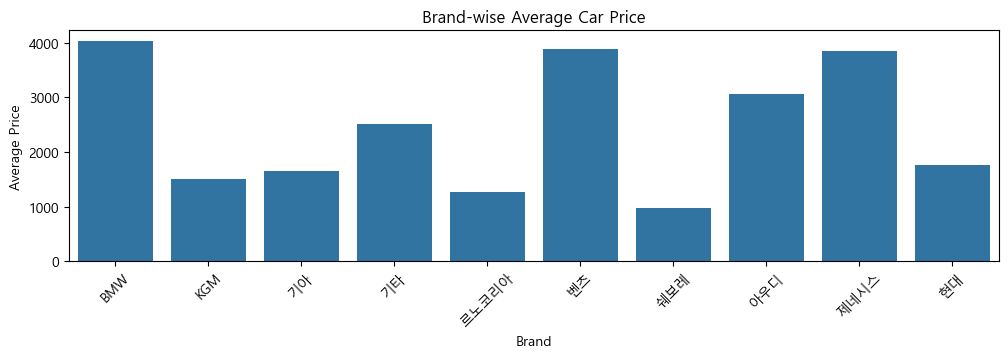

In [163]:
# car_brand별 평균 가격 계산
brand_avg_price = df.groupby('car_brand')['car_price'].mean()

# 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (예: "맑은 고딕")
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로 (Windows 기준)
font_prop = fm.FontProperties(fname=font_path).get_name()

plt.figure(figsize=(12, 3))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values)
plt.title('Brand-wise Average Car Price')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()
